# Training accuracy on Training Data
This Notebook calculates the accuracy of the SVM model on the TRAINING DATA. It is not recommended to use it as the accuracy of the model. It only provides a sanity check!!!!!

### Validation
After the SVM predictor model has been built, the predictor is asked to predict the mechanism class of the training profile. Ideally the model should predict the class of each training profile the same as the training class label, and have an accuracy of 100%.

If the models are somewhat ambiguous, we may get a lower accuracy.

The steps for verifying the training data are:

1. Train the SVM model on the training data 
1. Predict mechanism on the training data
1. Compare the predicted mechanism with the training label by calculating accuracy as the percentage of correctly labeled data.
1. Plot mismatched classes to visually inspect cause of mismatch 
1. Conclusion

In [41]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

from scripts.svm_tools import SVM
import pandas as pd
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 500
svm = SVM()

### 1. Train the SVM model on the training data 

In [ ]:
clfs = svm.train(impute='group_mean', 
          parameters={'C': [32]}, 
          normalize='l2', 
          dump='svm_classifiers.pkl', 
          smote=False, 
          prof_num=200);

### 2. Predict mechanism on the training data

In [2]:
preds = svm.predict()

Removing extra target colunms: []


### 3. Compare the predicted mechanism with the training label.

In [47]:
# predicted class: max decision value
df = svm.get_best_class().set_index('Profile')

tm = pd.read_excel('data/Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
tm.columns = ['Profile', 'Mechanism']
tm.set_index('Profile', inplace=True)

ver = df.join(tm, lsuffix='_pred', rsuffix='_train')
ver = tm.join(df, rsuffix='_pred', lsuffix='_train')

mism = ver[(ver.Mechanism_pred != ver.Mechanism_train)]

printmd("### <center><font color='red'>Percent mismatch in Training data: " + str(round(len(mism) / len(df) * 100, 1)) + "</font></center>")
#mism.to_excel('output/train_match.xlsx')

### <center><font color='red'>Percent mismatch in Training data: 15.9</font></center>

### The table below shows the training profiles that the classifier incorrectly identified.

In [12]:
mism

Mechanism_train  \
Profile                                                                                 
Trusted, Agents, Cyclosporin A, BSK-C016173, 41.2 nM            Calcineurin inhibitor   
Trusted, Agents, FK-506, BSK-C016173, 4.6 nM                    Calcineurin inhibitor   
Trusted, Agents, Prostaglandin E1, BSK-C016173, 10000 nM                   EP agonist   
Trusted, Agents, Prostaglandin E1, BSK-C016173, 1111.1 nM                  EP agonist   
Trusted, Agents, Prostaglandin E1, BSK-C016173, 3333.3 nM                  EP agonist   
Trusted, Agents, Prostaglandin E1, BSK-C016173, 370.4 nM                   EP agonist   
Trusted, Agents, Prostaglandin E2, BSK-C016173, 1111.1 nM                  EP agonist   
Trusted, Agents, Prostaglandin E2, BSK-C016173, 3333.3 nM                  EP agonist   
Trusted, Agents, Prostaglandin E2, BSK-C016173, 370.4 nM                   EP agonist   
Trusted, Agents, Radicicol, BSK-C016173, 3333.3 nM                    Hsp90 inhibitor   
Trusted, Agents, PD184352, BSK-C016173, 3333.3 nM                       MEK inhibitor   
Trusted, Agents, SL 327, BSK-C016173, 10000 nM                          MEK inhibitor   
Trusted, Agents, SL 327, BSK-C016173, 30000 nM                          MEK inhibitor   
Trusted, Agents, UO126, BSK-C016173, 10000 nM                           MEK inhibitor   
Trusted, Agents, Antimycin A, BSK-C016173, 10000 nM           Mitochondrial inhibitor   
Trusted, Agents, Antimycin A, BSK-C016173, 3333.3 nM          Mitochondrial inhibitor   
Trusted, Agents, Oligomycin A, BSK-C016173, 10000 nM          Mitochondrial inhibitor   
Trusted, Agents, Rotenone, BSK-C016173, 10000 nM              Mitochondrial inhibitor   
Trusted, Agents, Shaoguamycin B, BSK-C016173, 37 nM           Mitochondrial inhibitor   
Trusted, Agents, Ibudilast, BSK-C016173, 90000 nM                      mTOR inhibitor   
Trusted, Agents, GF 109203X, BSK-C016173, 1000 nM                      mTOR inhibitor   
Trusted, Agents, GF 109203X, BSK-C016173, 1111.1 nM                    mTOR inhibitor   
Trusted, Agents, GF 109203X, BSK-C016173, 370.4 nM                     mTOR inhibitor   
Trusted, Agents, Go 6983, BSK-C016173, 1000 nM                         mTOR inhibitor   
Trusted, Agents, 9-cis-Retinoic Acid, BSK-C016173, 1234.6 nM       p38 MAPK inhibitor   
Trusted, Agents, 9-cis-Retinoic Acid, BSK-C016173, 137.2 nM        p38 MAPK inhibitor   
Trusted, Agents, AZD0530, BSK-C016173, 10000 nM                      PDE IV inhibitor   
Trusted, Agents, AZD0530, BSK-C016173, 3333.3 nM                     PDE IV inhibitor   
Trusted, Agents, Enbrel, BSK-C016173, 1000 ng/ml                       PI3K inhibitor   
Trusted, Agents, Enbrel, BSK-C016173, 10000 ng/ml                      PI3K inhibitor   
Trusted, Agents, Humira, BSK-C016173, 1000 ng/ml                       PI3K inhibitor   
Trusted, Agents, Humira, BSK-C016173, 10000 ng/ml                 PKC (c+n) inhibitor   
Trusted, Agents, Humira, BSK-C016173, 30000 ng/ml                 PKC (c+n) inhibitor   
Trusted, Agents, Remicade, BSK-C016173, 1000 ng/ml                PKC (c+n) inhibitor   
Trusted, Agents, Remicade, BSK-C016173, 10000 ng/ml               PKC (c+n) inhibitor   
Trusted, Agents, Remicade, BSK-C016173, 30000 ng/ml               PKC (c+n) inhibitor   
Trusted, Agents, Everolimus, BSK-C016173, 1.4 nM                 Proteasome inhibitor   
Trusted, Agents, Everolimus, BSK-C016173, 12.3 nM                Proteasome inhibitor   
Trusted, Agents, Everolimus, BSK-C016173, 37 nM                  Proteasome inhibitor   
Trusted, Agents, Temsirolimus, BSK-C016173, 123.5 nM             Src family inhibitor   
Trusted, Agents, Temsirolimus, BSK-C016173, 13.7 nM              Src family inhibitor   
Trusted, Agents, Temsirolimus, BSK-C016173, 3333.3 nM            Src family inhibitor   
Trusted, Agents, Temsirolimus, BSK-C016173, 370.4 nM             Src family inhibitor   
Trusted, Agents, Temsirolimus, BSK-C016173, 41.2 nM              

## The table below shows how many in each class were misclassified

In [18]:
mism2 = mism.groupby(['Mechanism_train','Mechanism_pred']).size().reset_index().rename(columns={0:'count'})
mism2.sort_values('Mechanism_train', ascending=False)

Mechanism_train              Mechanism_pred  count
15       p38 MAPK inhibitor            PDE IV inhibitor      2
14           mTOR inhibitor          p38 MAPK inhibitor      5
13         TNF-α antagonist  Vitamin D receptor agonist      8
12     Src family inhibitor             RAR/RXR agonist      5
10     Proteasome inhibitor         PKC (c+n) inhibitor      2
11     Proteasome inhibitor             RAR/RXR agonist      1
9       PKC (c+n) inhibitor            PDE IV inhibitor      5
8            PI3K inhibitor            PDE IV inhibitor      3
7          PDE IV inhibitor              mTOR inhibitor      2
6   Mitochondrial inhibitor          p38 MAPK inhibitor      5
5             MEK inhibitor              mTOR inhibitor      4
4           Hsp90 inhibitor          p38 MAPK inhibitor      1
1                EP agonist            PDE IV inhibitor      5
2                EP agonist         PKC (c+n) inhibitor      1
3                EP agonist              mTOR inhibitor      1
0     Calcineurin inhibitor          p38 MAPK inhibitor      2

### 4. Plot Mismatched Classification

Traing: Calcineurin inhibitor


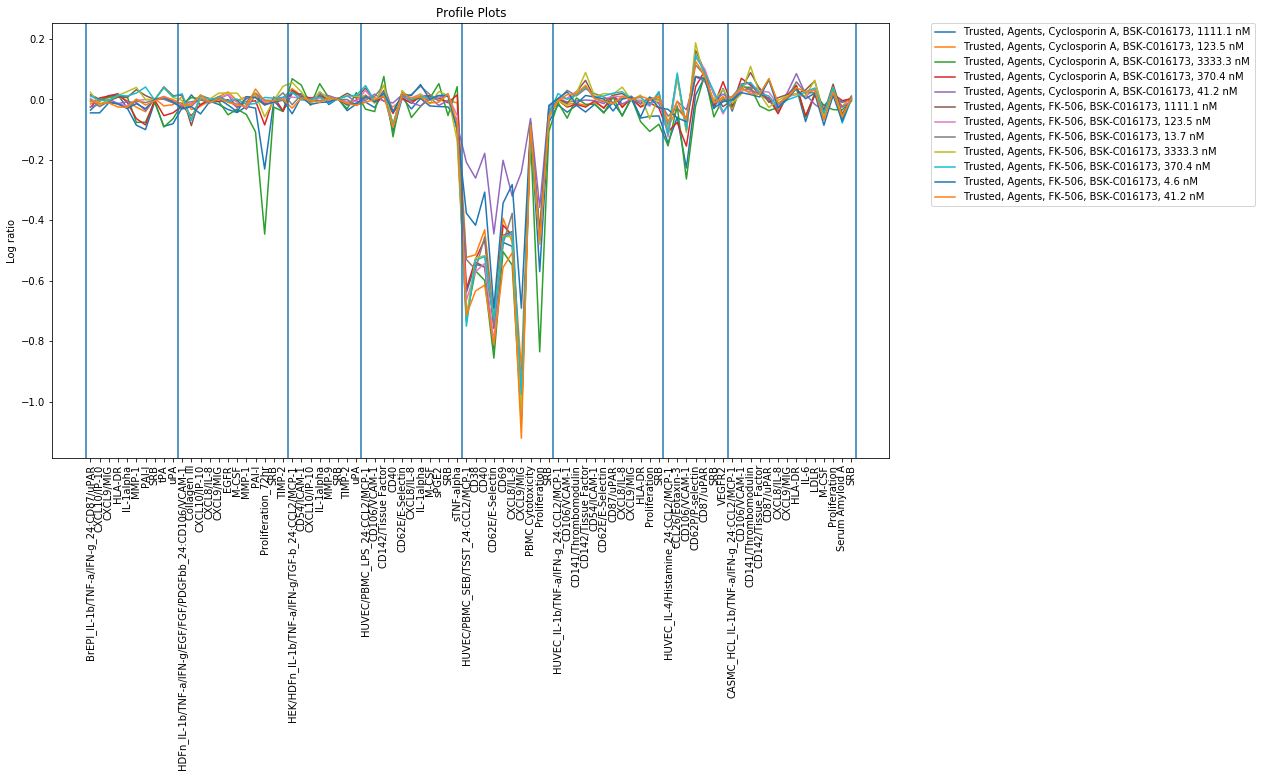

Predicted: p38 MAPK inhibitor


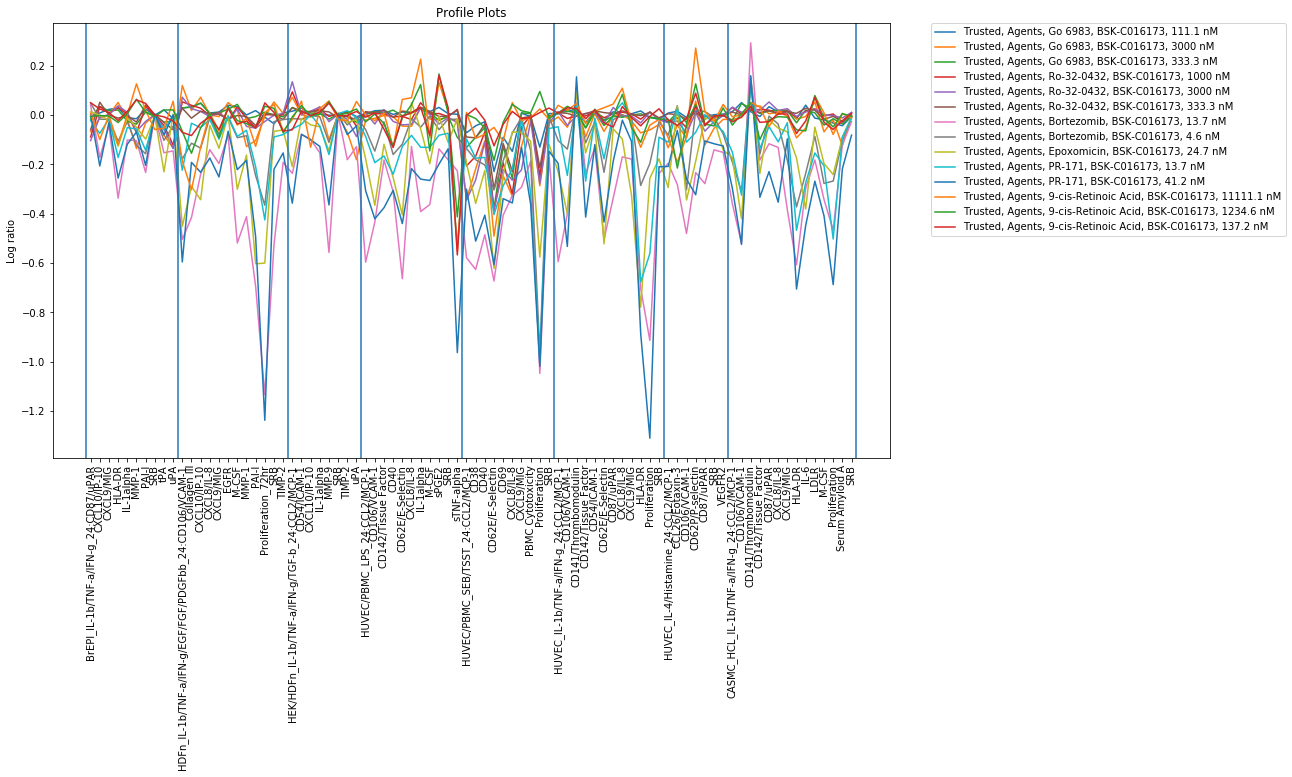

Traing: EP agonist


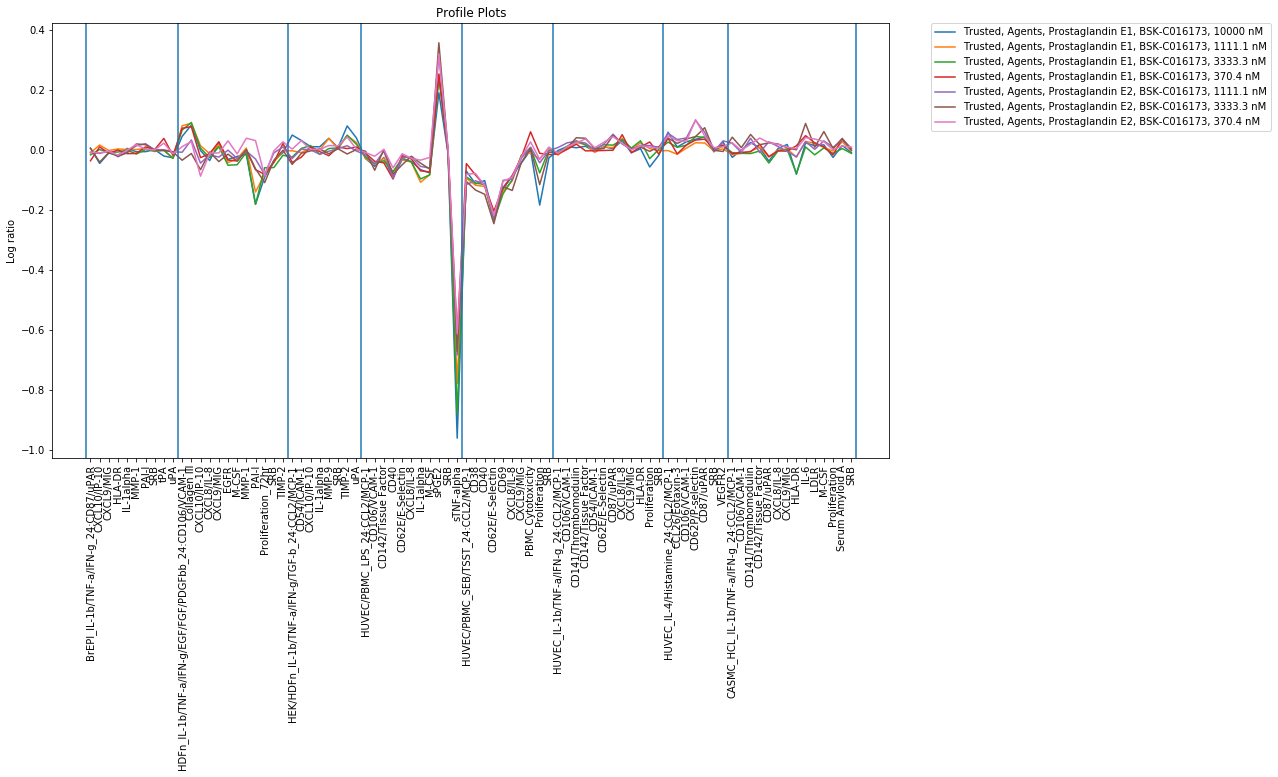

Predicted: PDE IV inhibitor


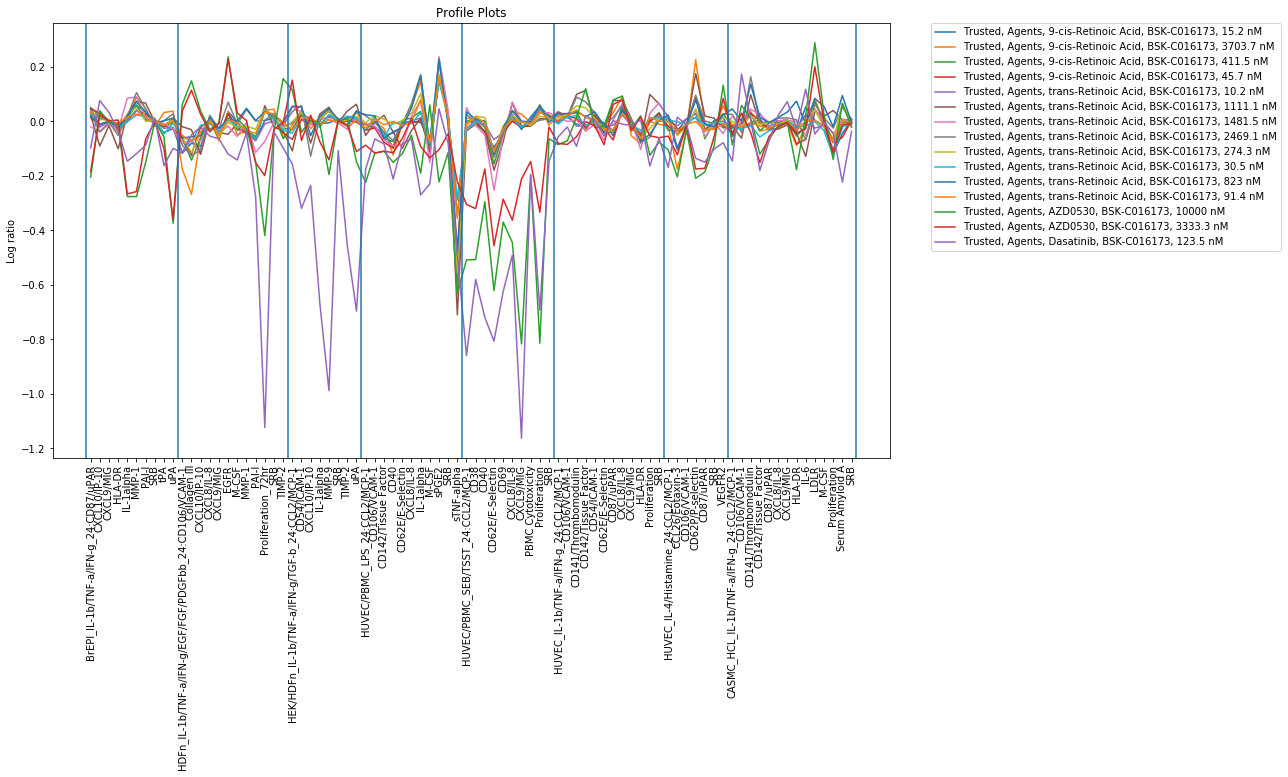

Predicted: PKC (c+n) inhibitor


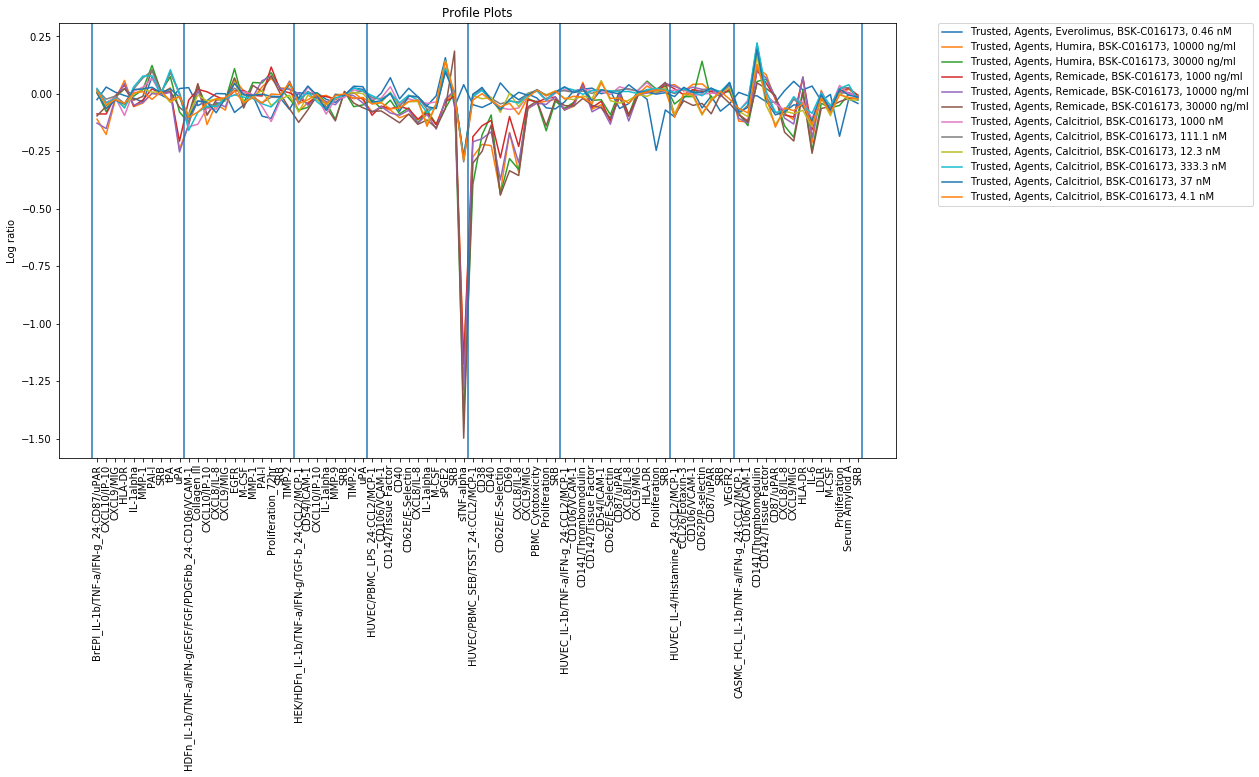

Predicted: mTOR inhibitor


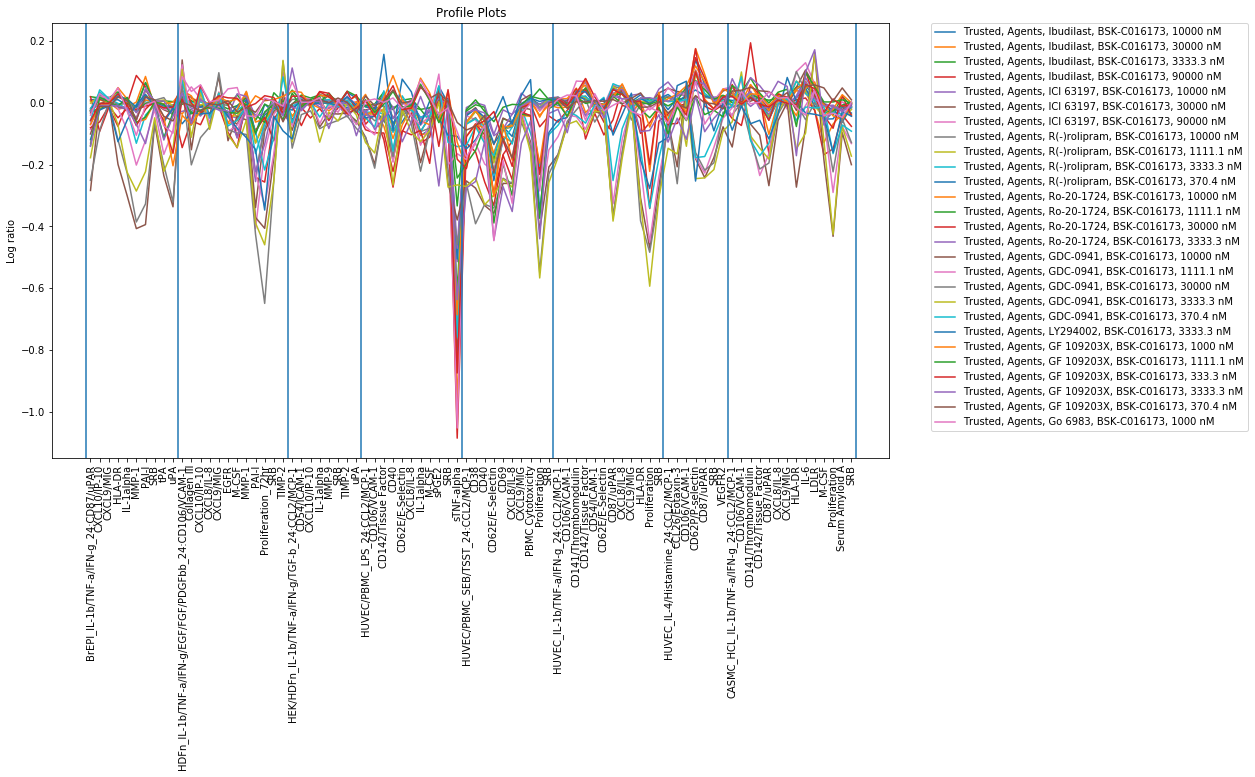

Traing: Hsp90 inhibitor


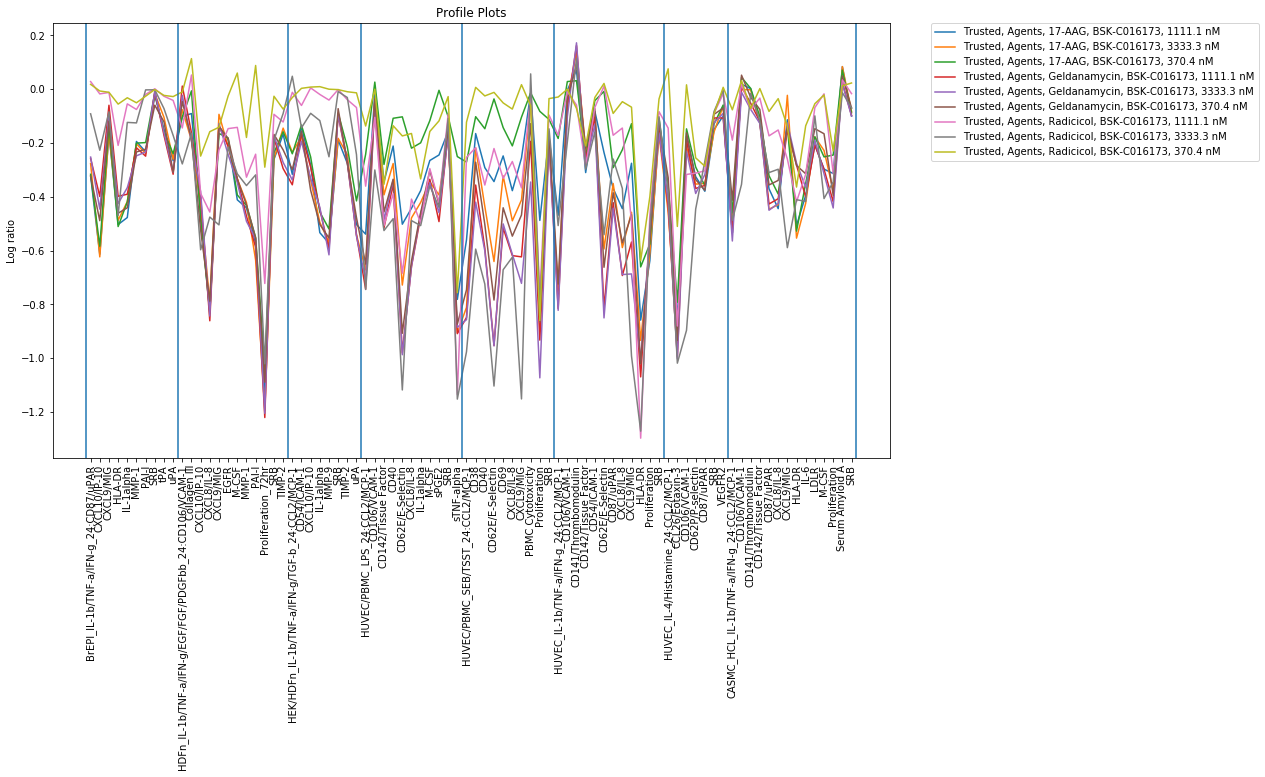

Predicted: p38 MAPK inhibitor


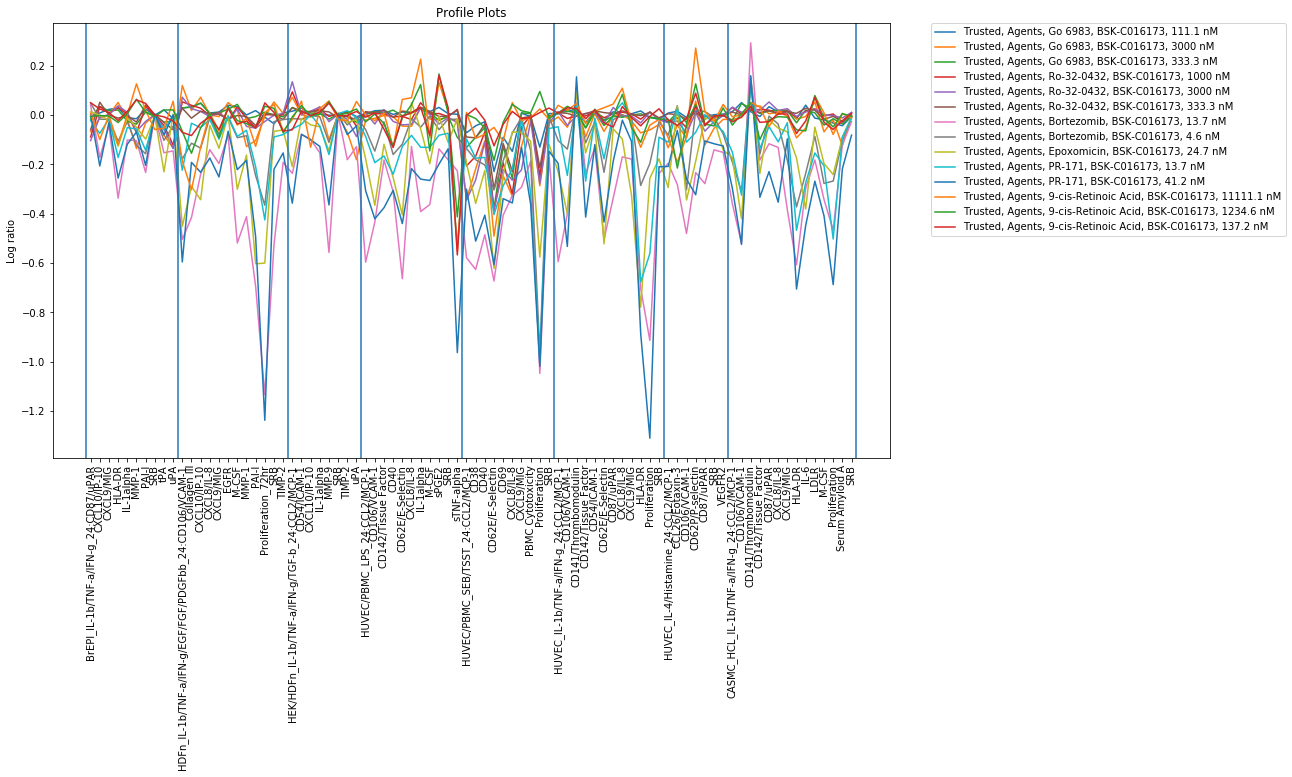

Traing: MEK inhibitor


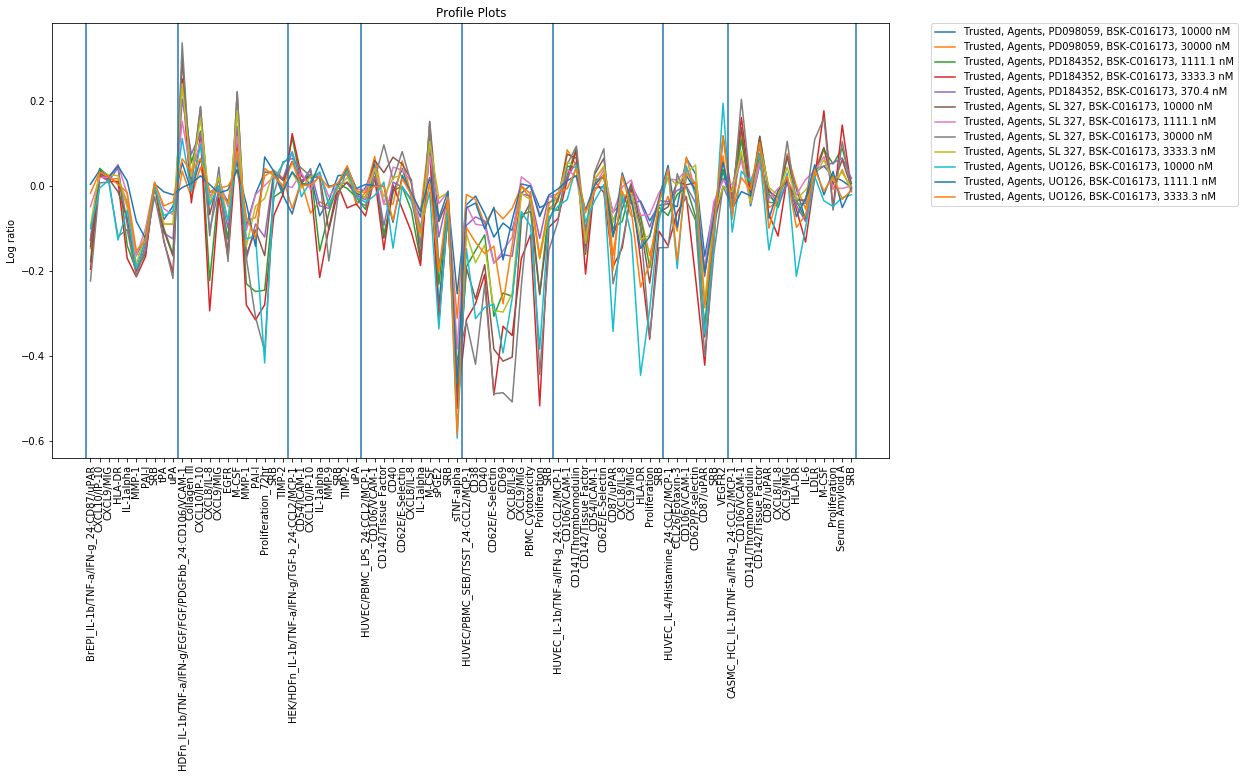

Predicted: mTOR inhibitor


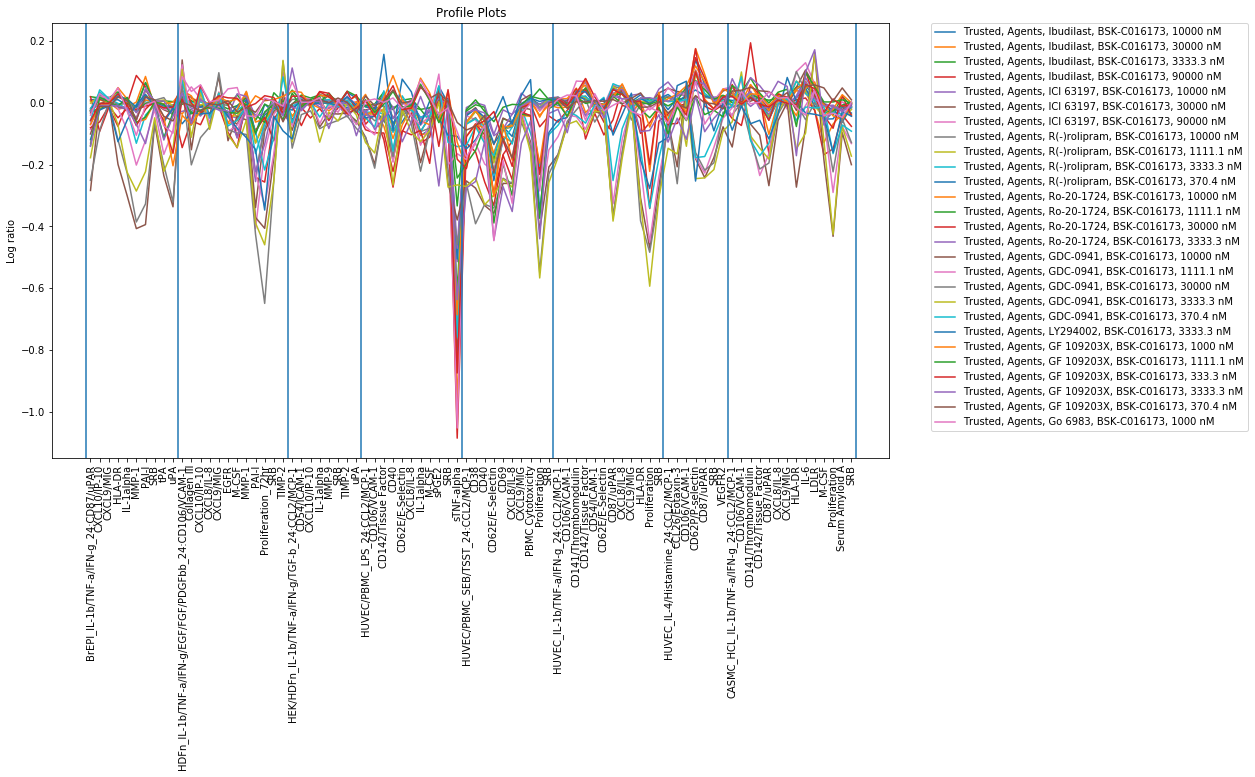

Traing: Mitochondrial inhibitor


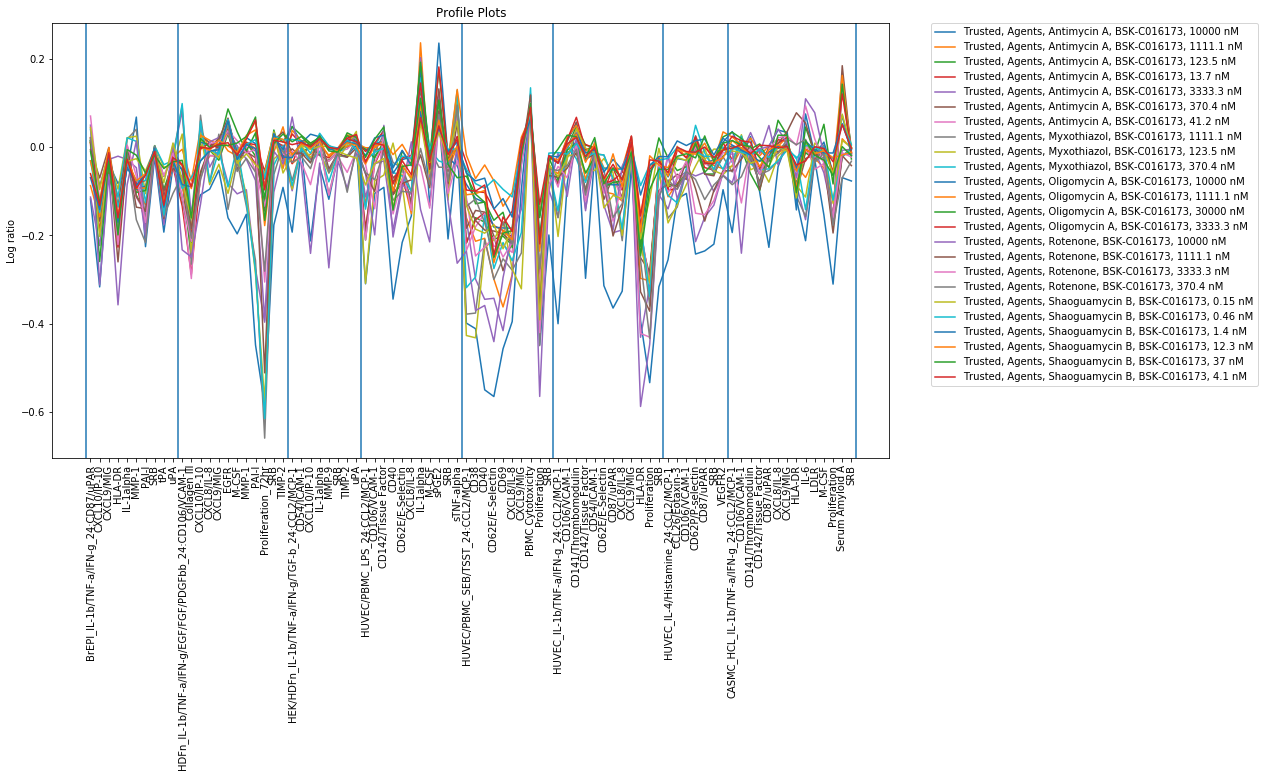

Predicted: p38 MAPK inhibitor


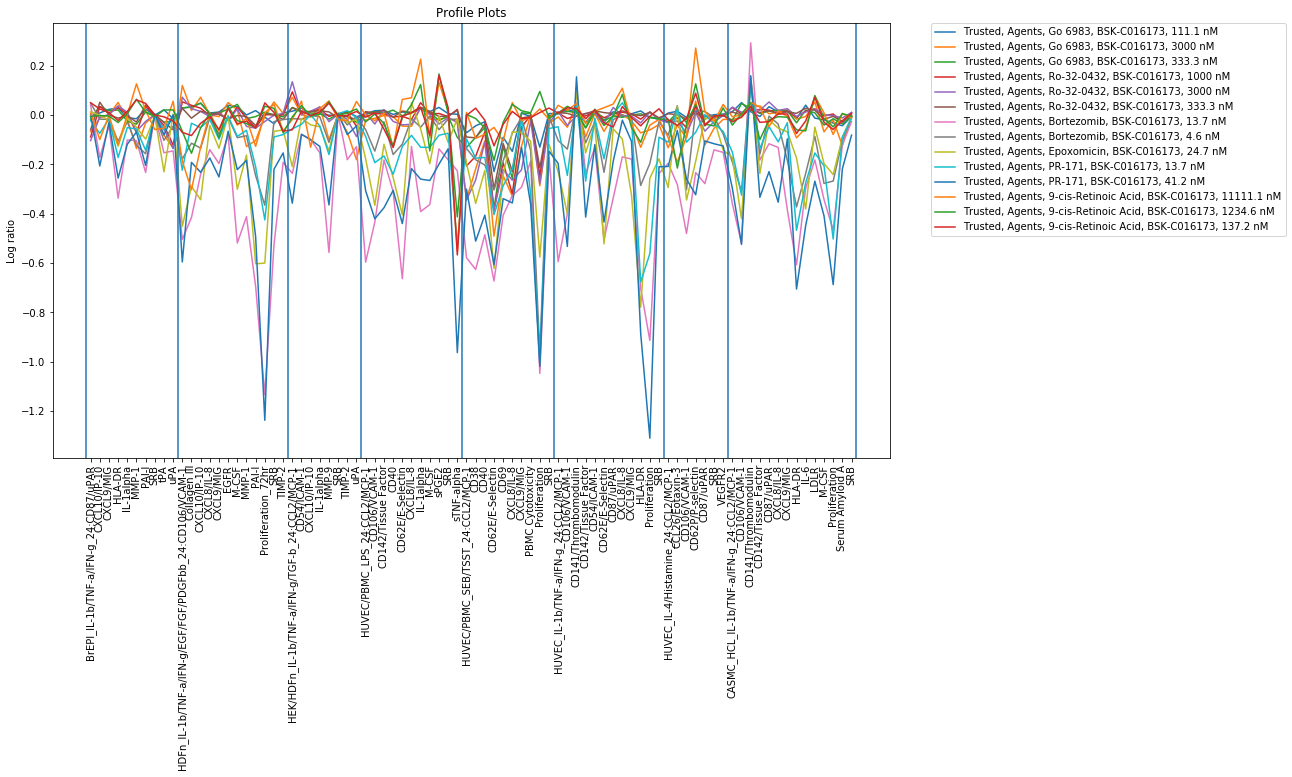

Traing: PDE IV inhibitor


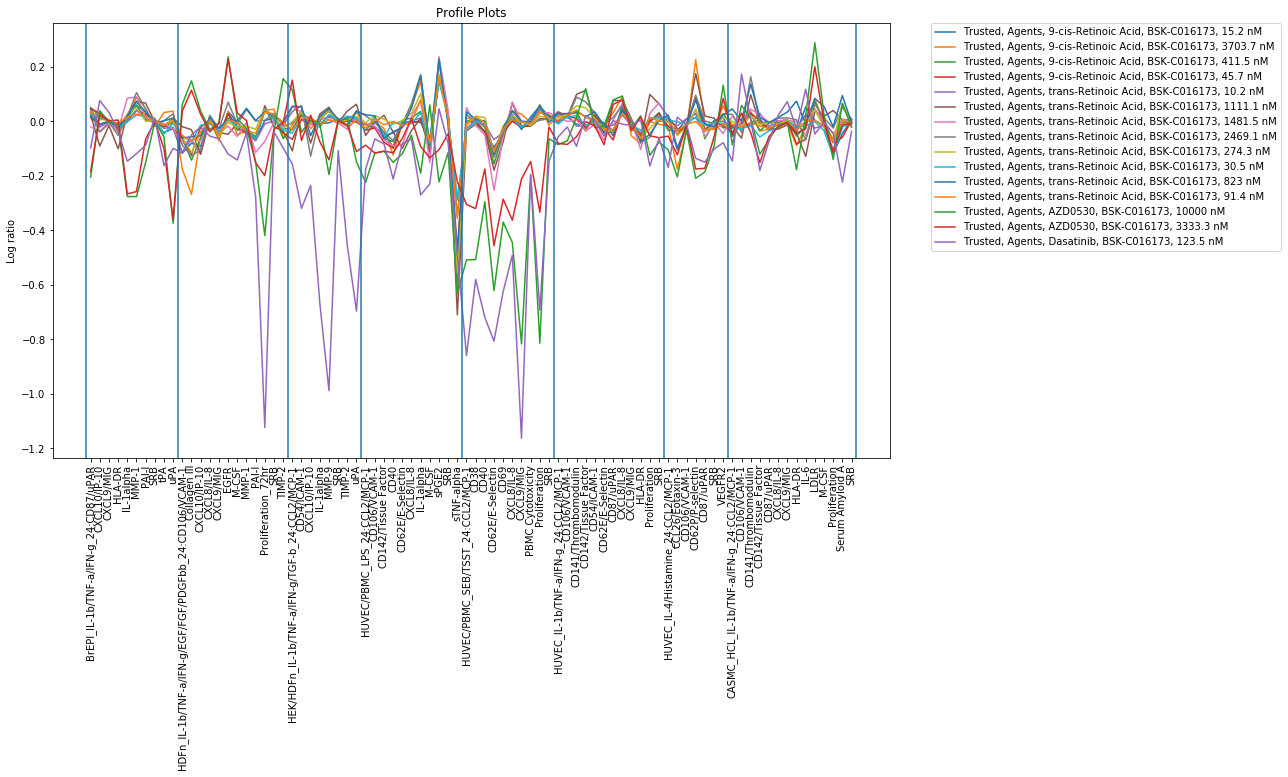

Predicted: mTOR inhibitor


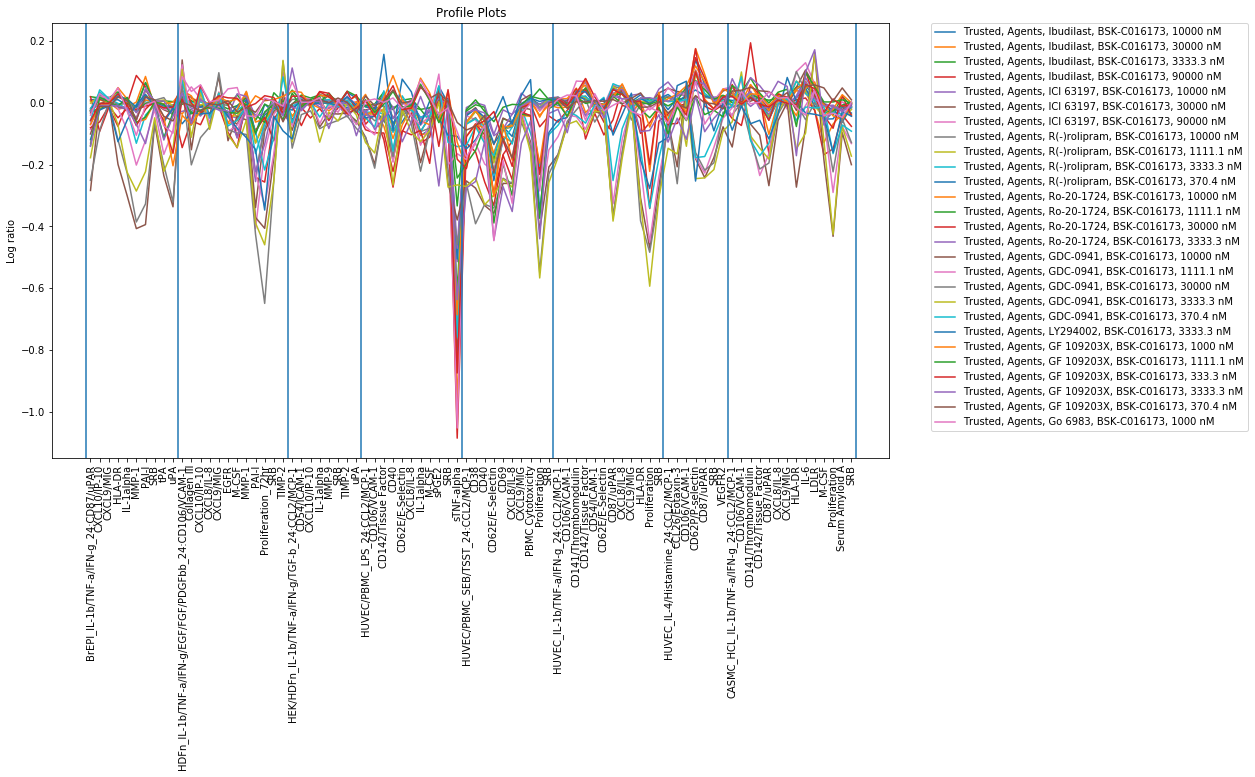

Traing: PI3K inhibitor


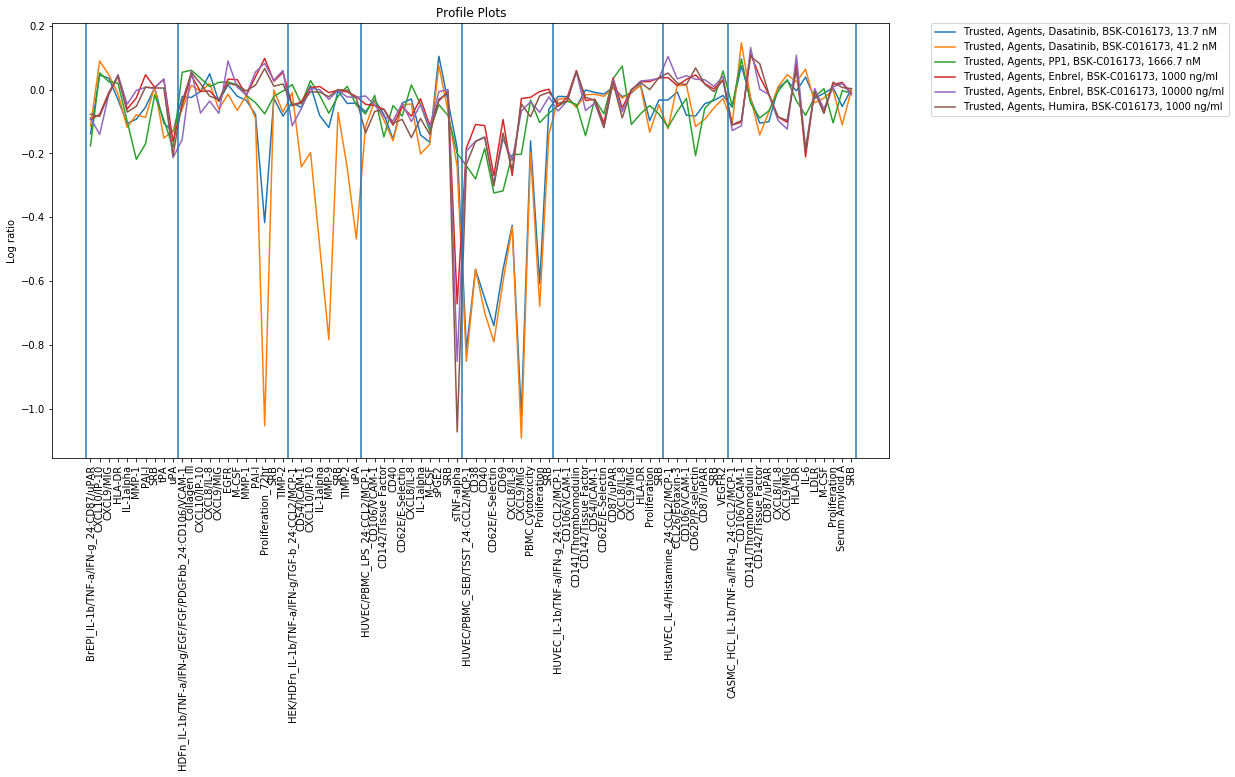

Predicted: PDE IV inhibitor


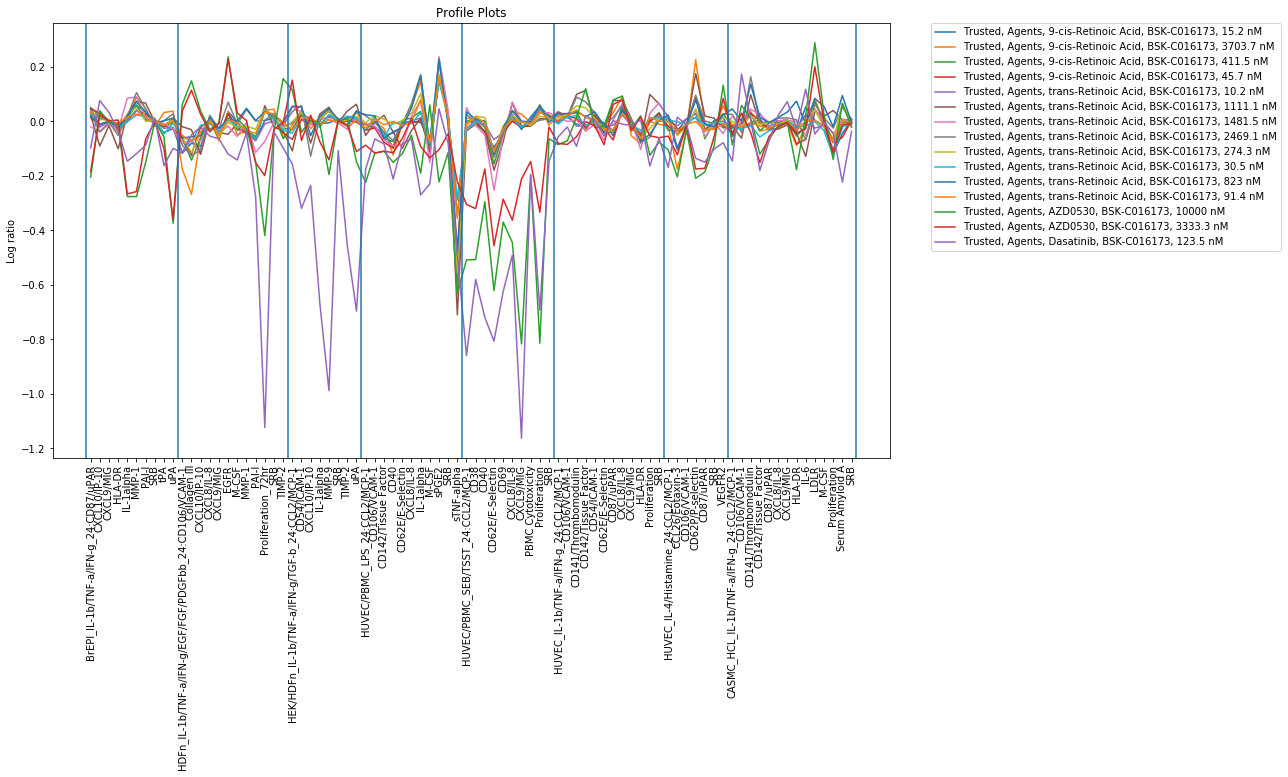

Traing: PKC (c+n) inhibitor


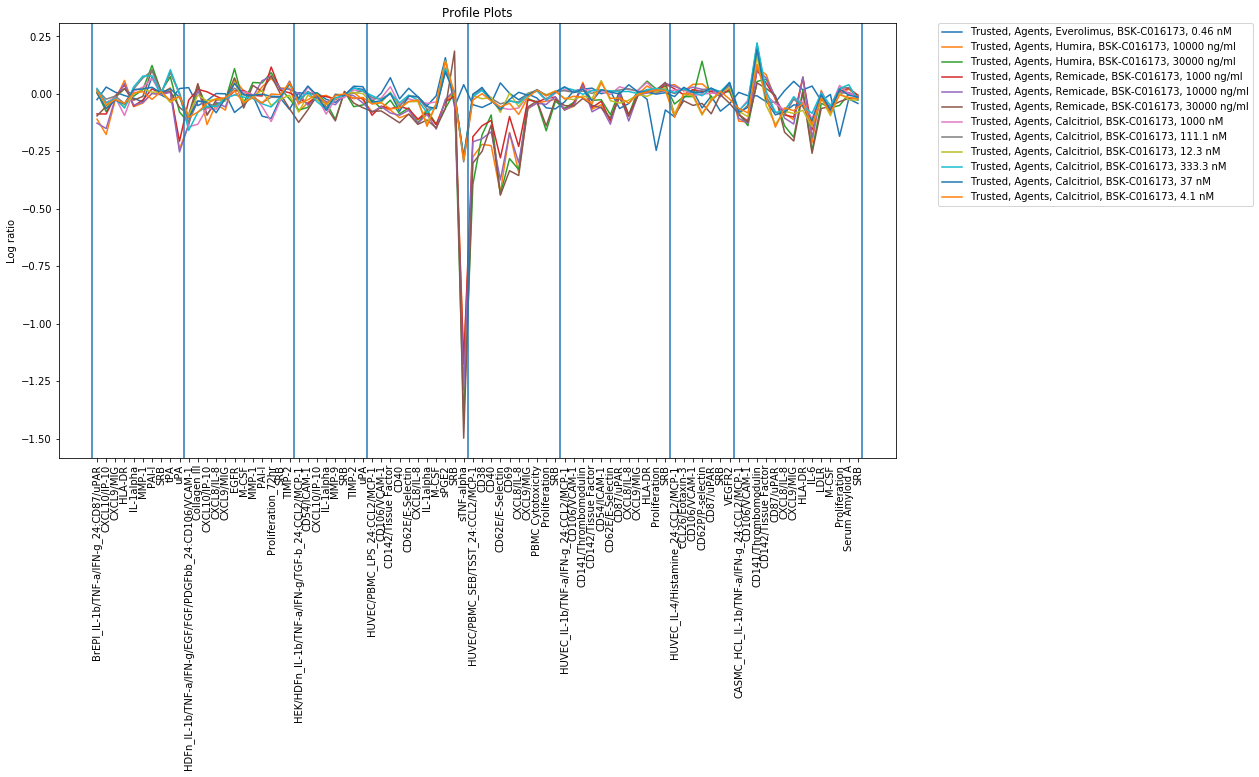

Predicted: PDE IV inhibitor


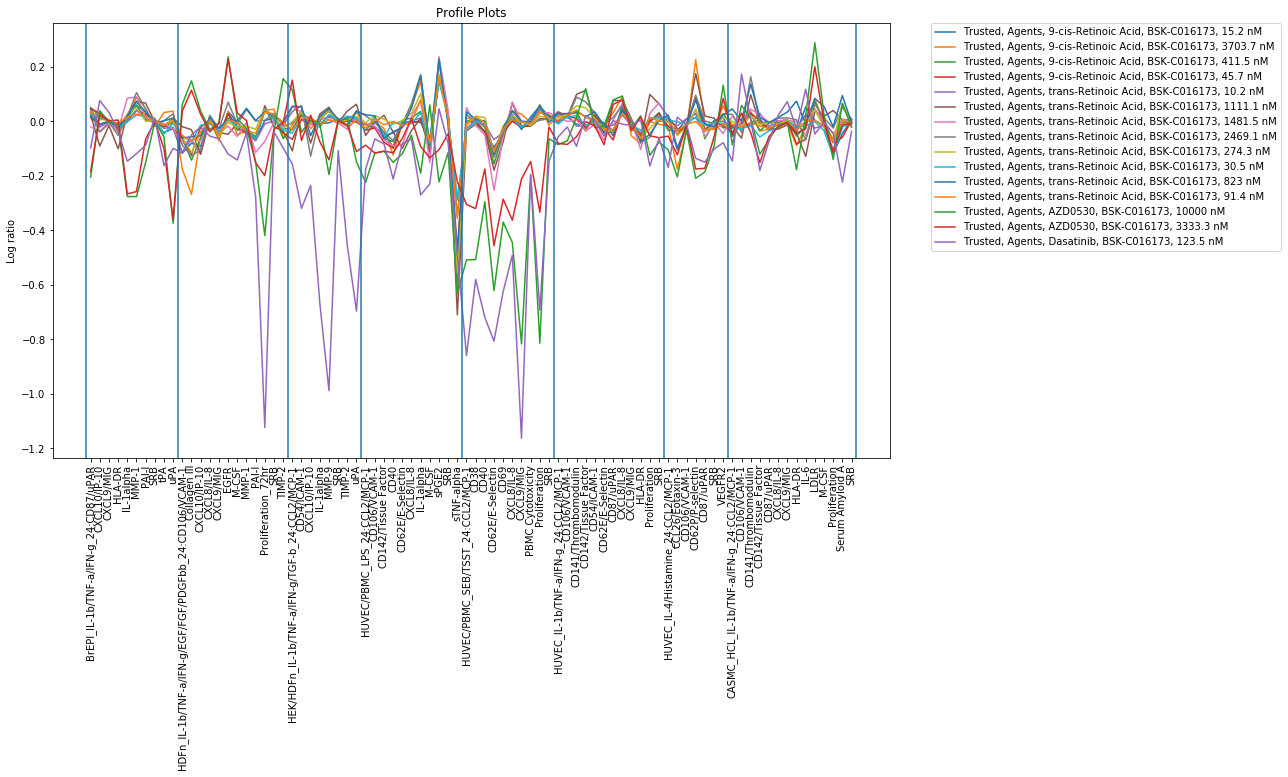

Traing: Proteasome inhibitor


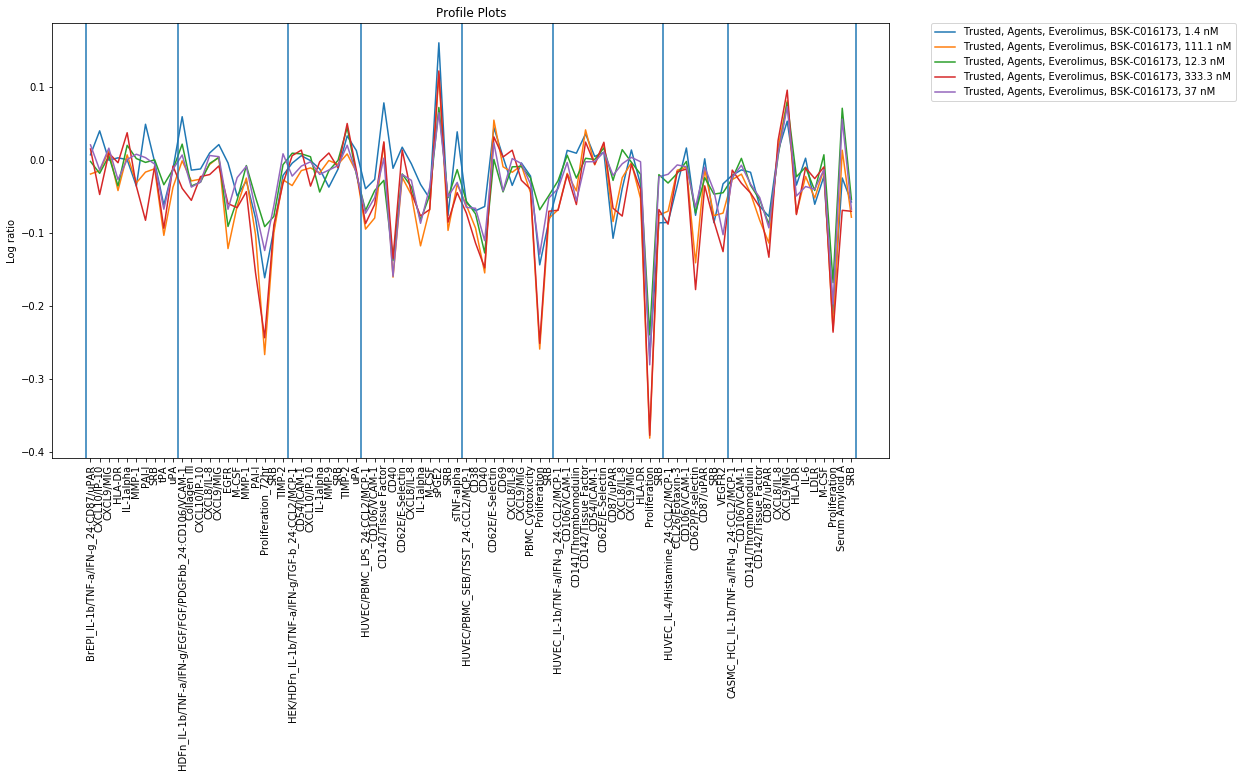

Predicted: PKC (c+n) inhibitor


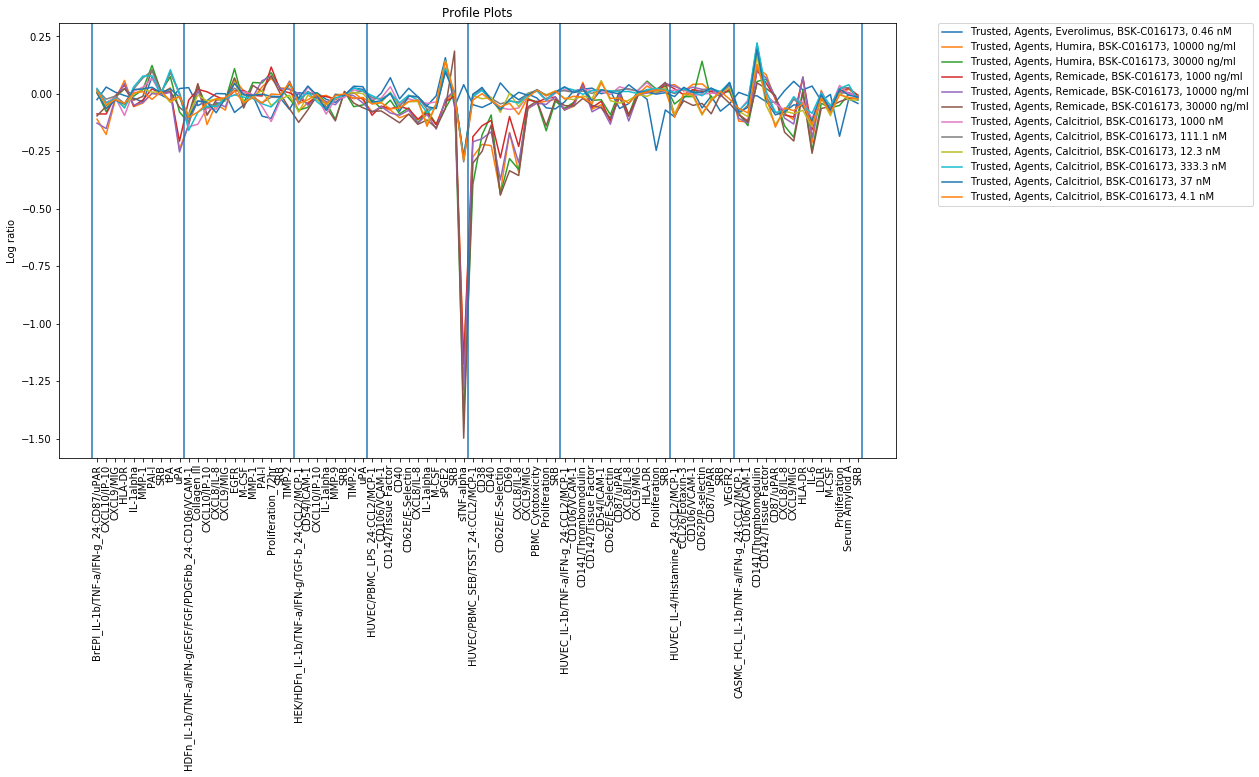

Predicted: RAR/RXR agonist


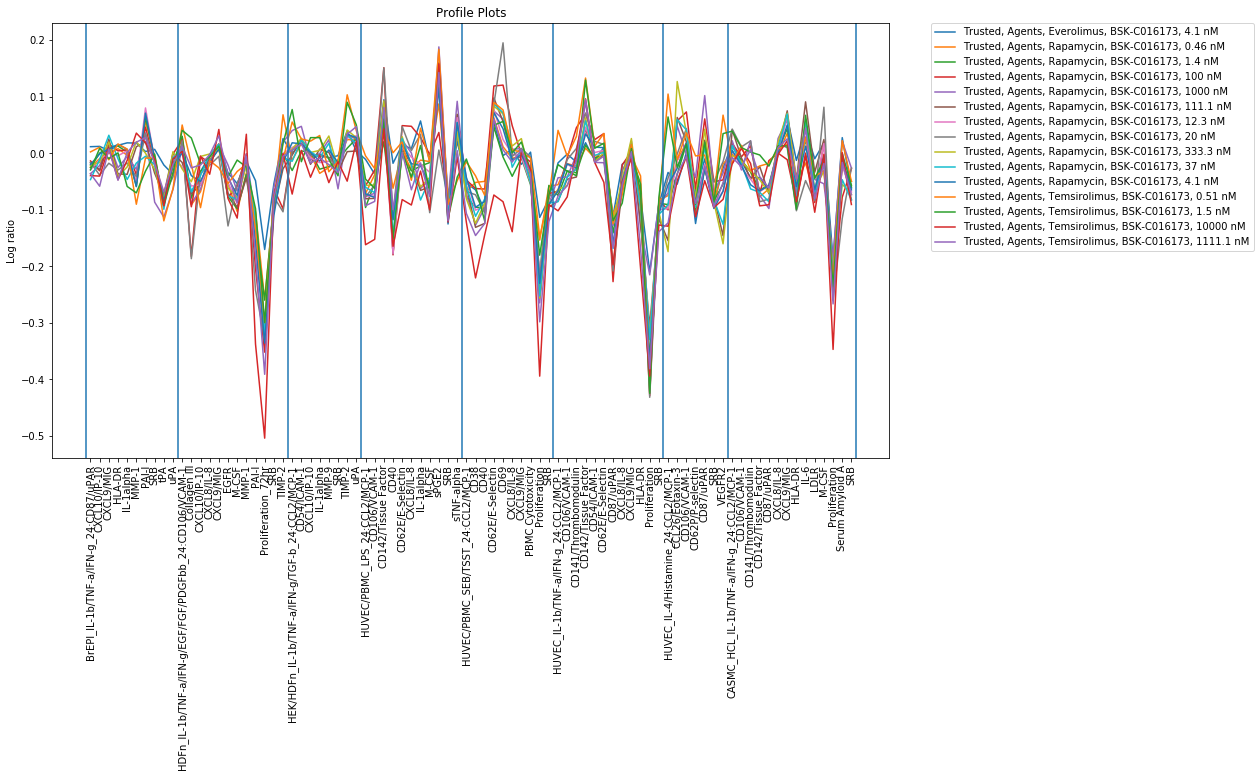

Traing: Src family inhibitor


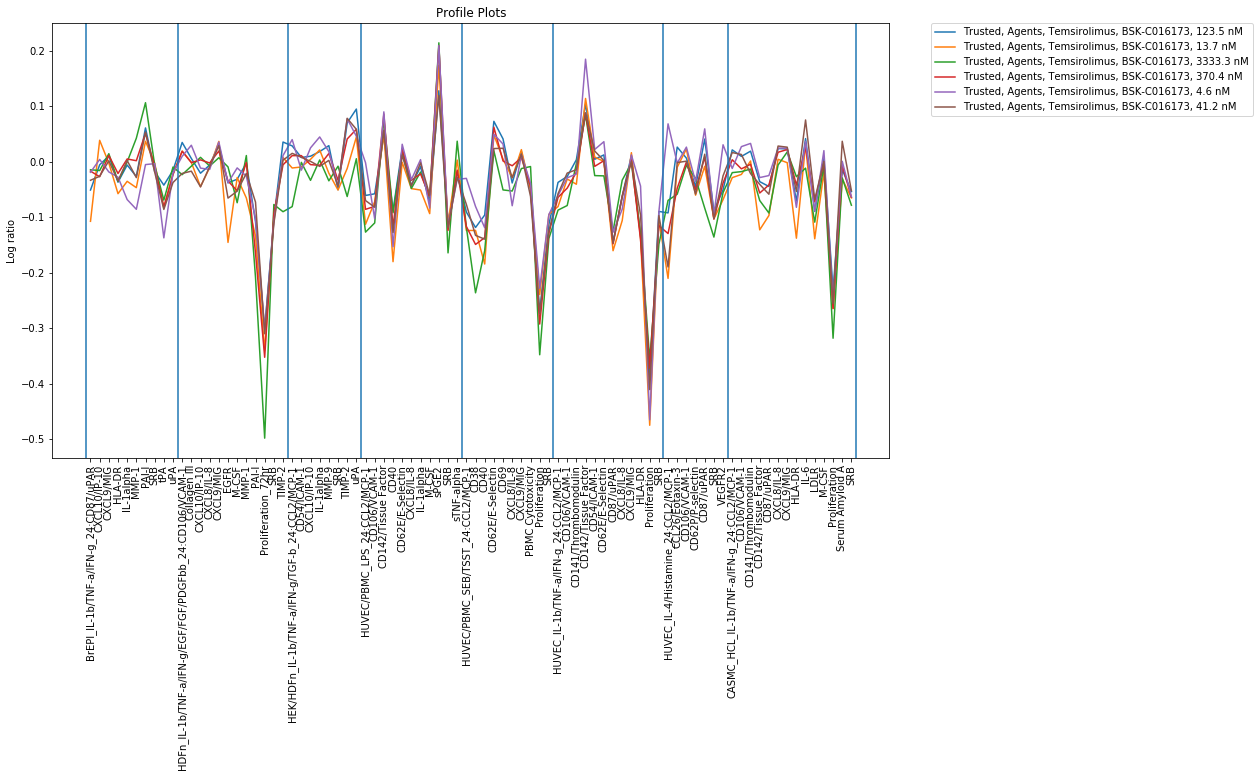

Predicted: RAR/RXR agonist


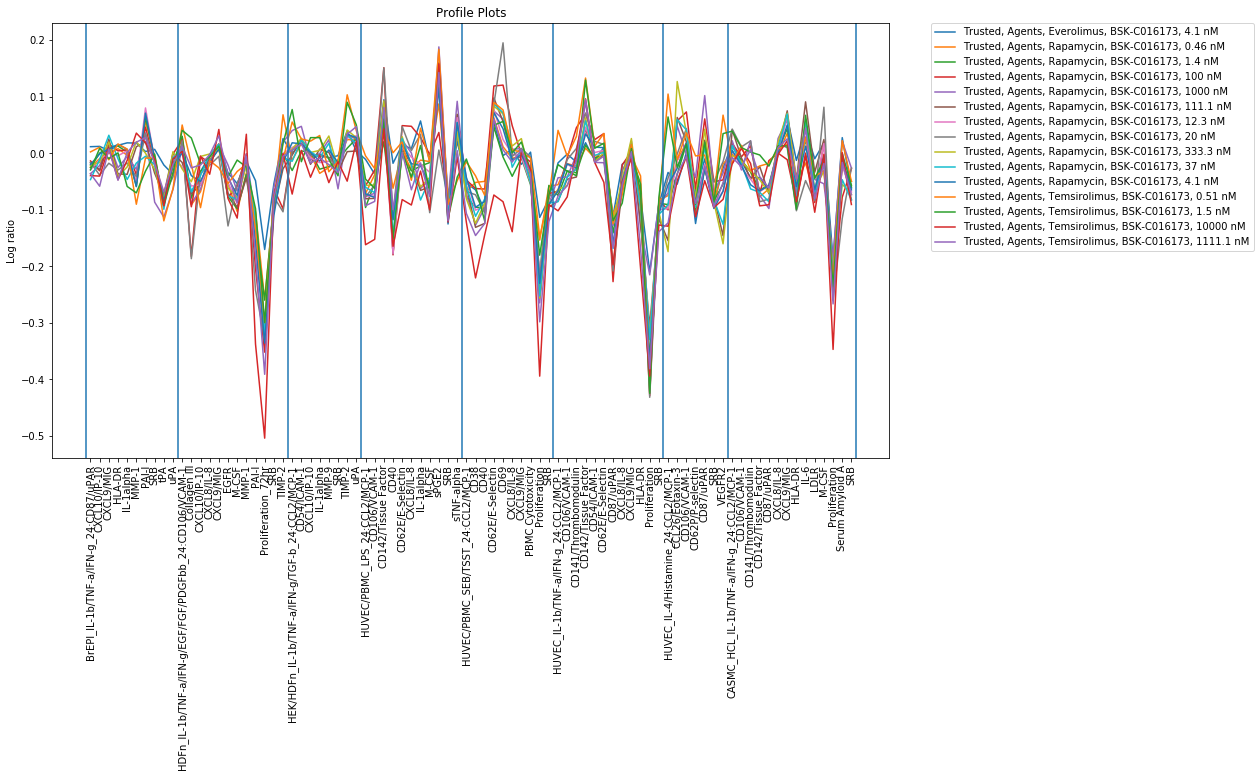

Traing: TNF-α antagonist


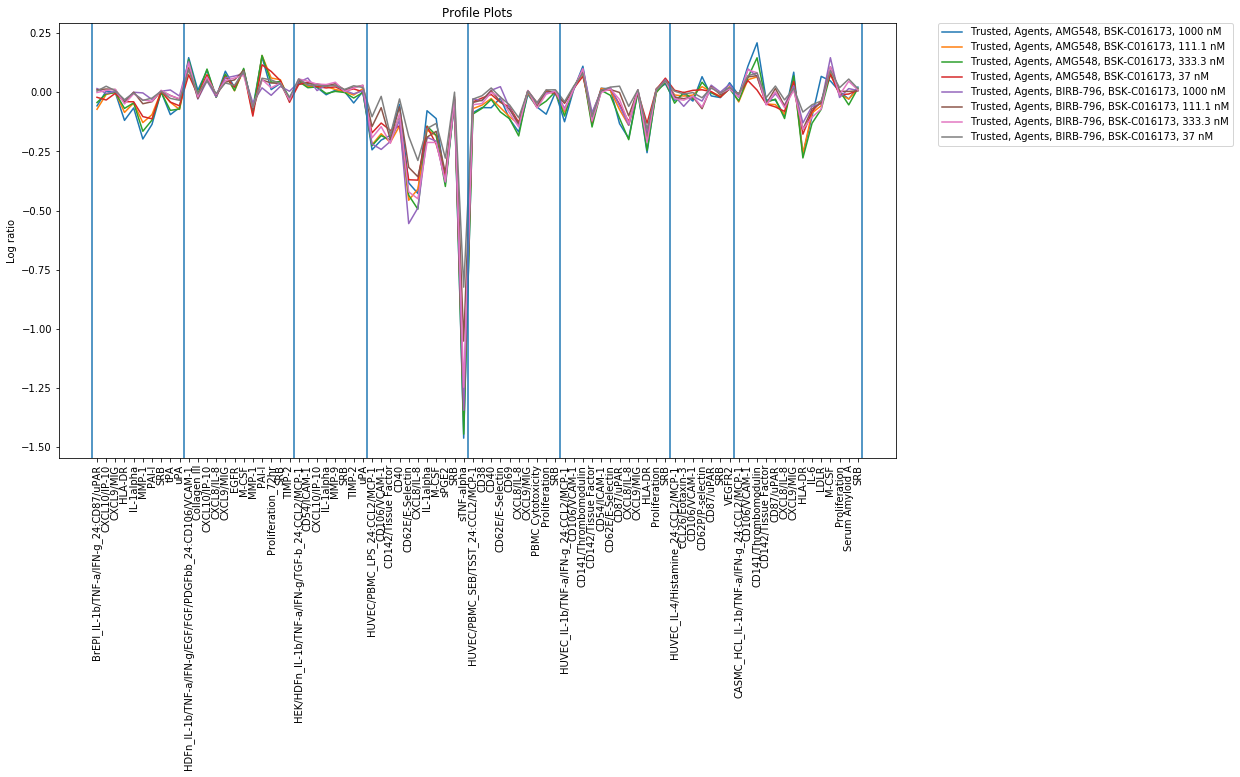

Predicted: Vitamin D receptor agonist


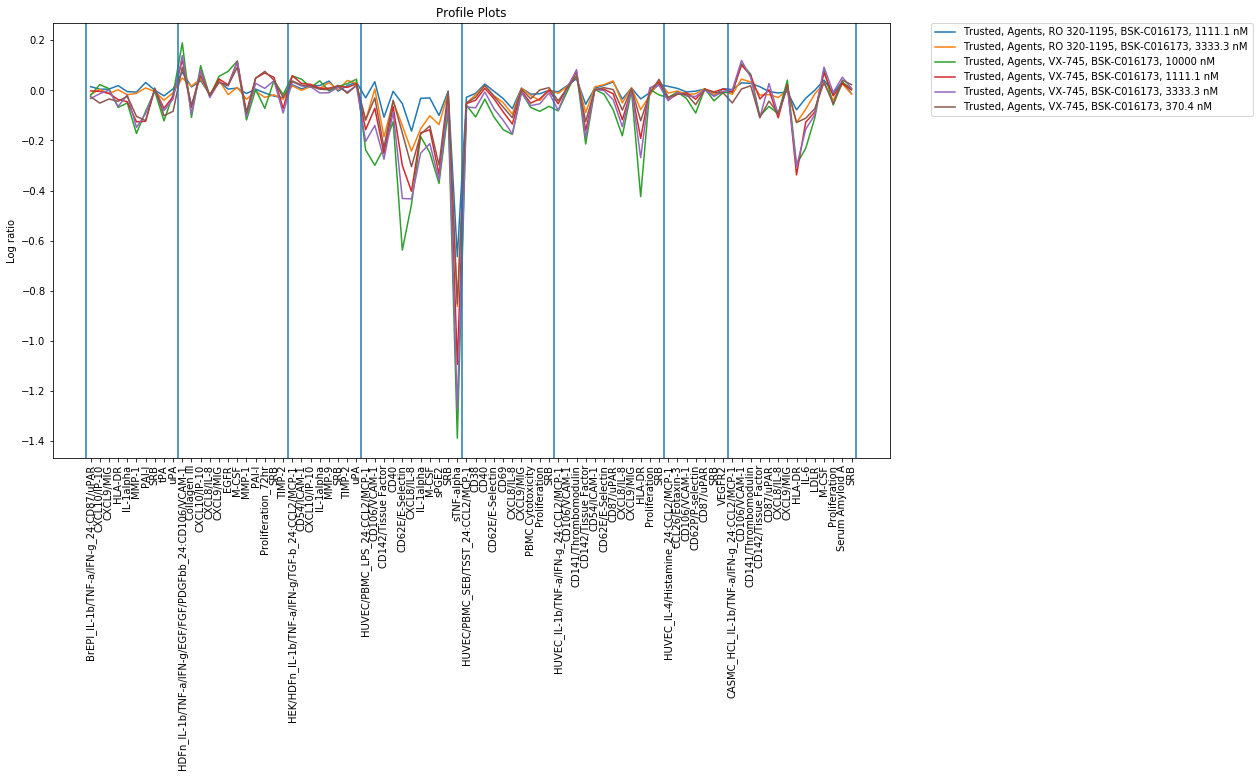

Traing: mTOR inhibitor


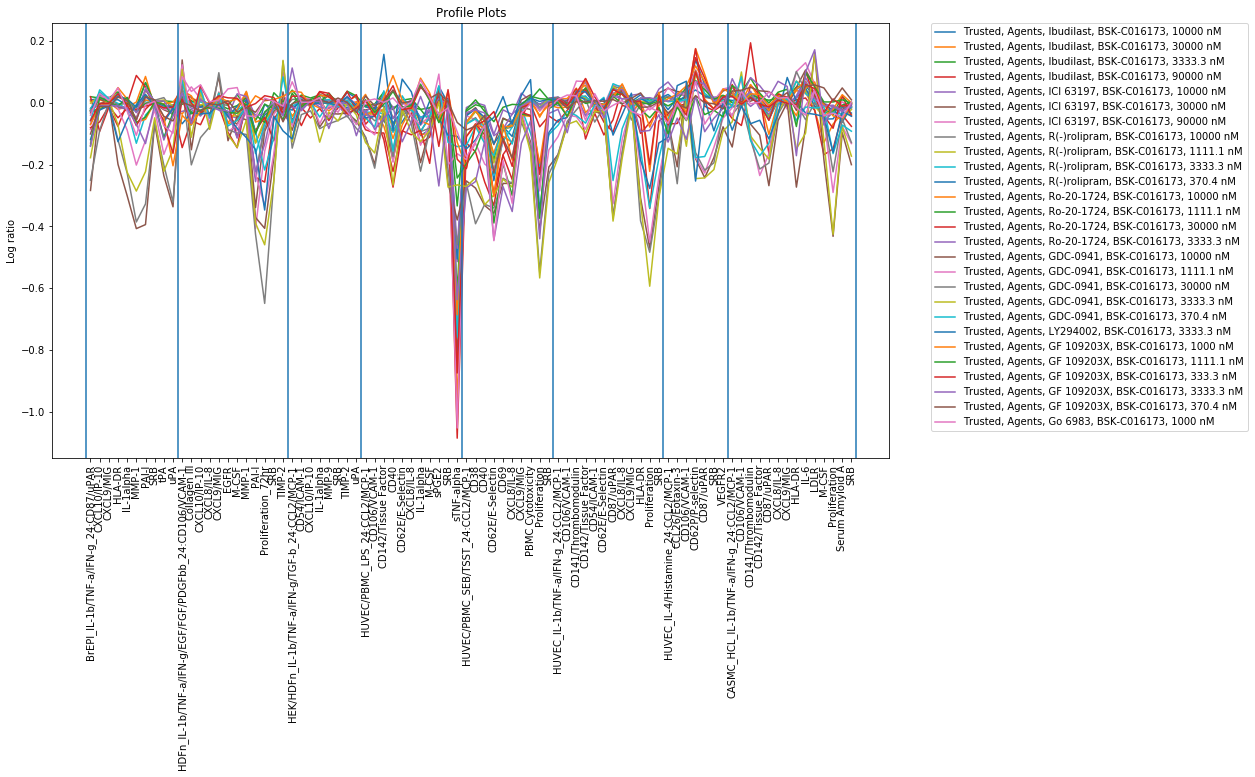

Predicted: p38 MAPK inhibitor


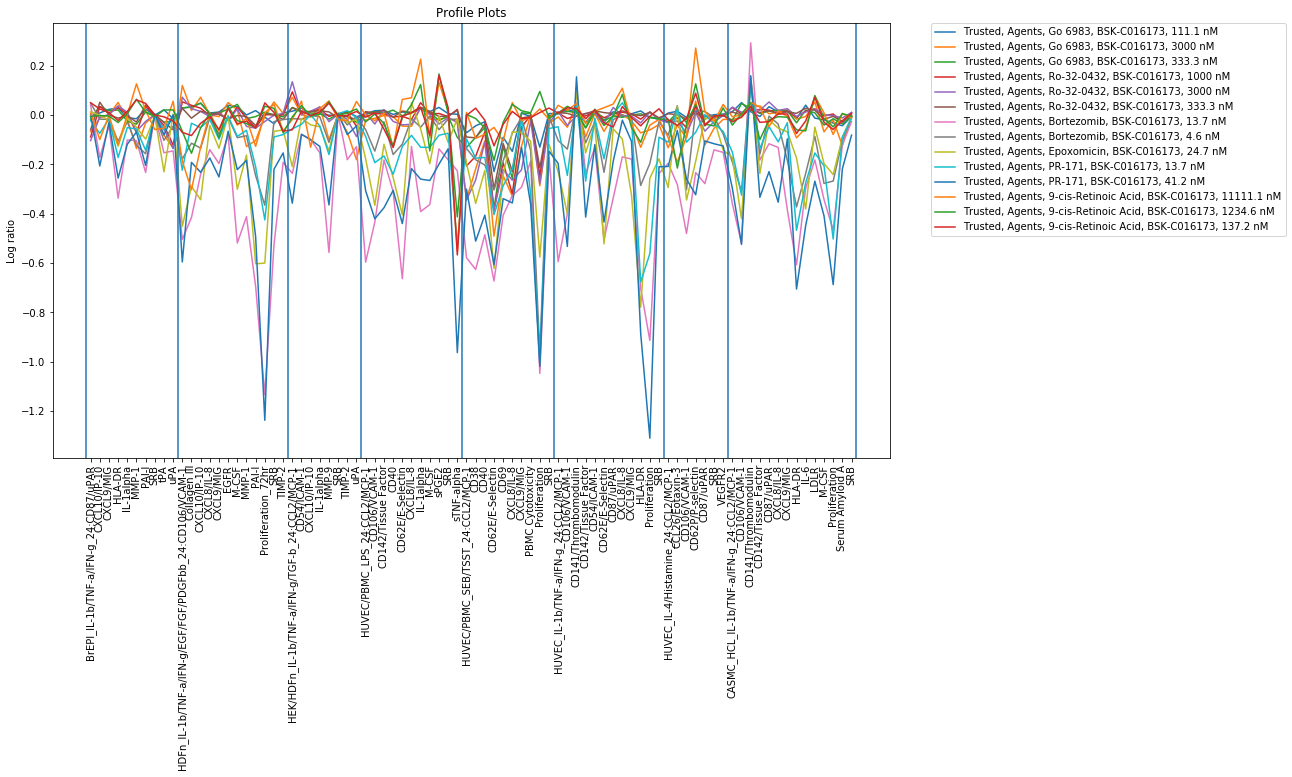

Traing: p38 MAPK inhibitor


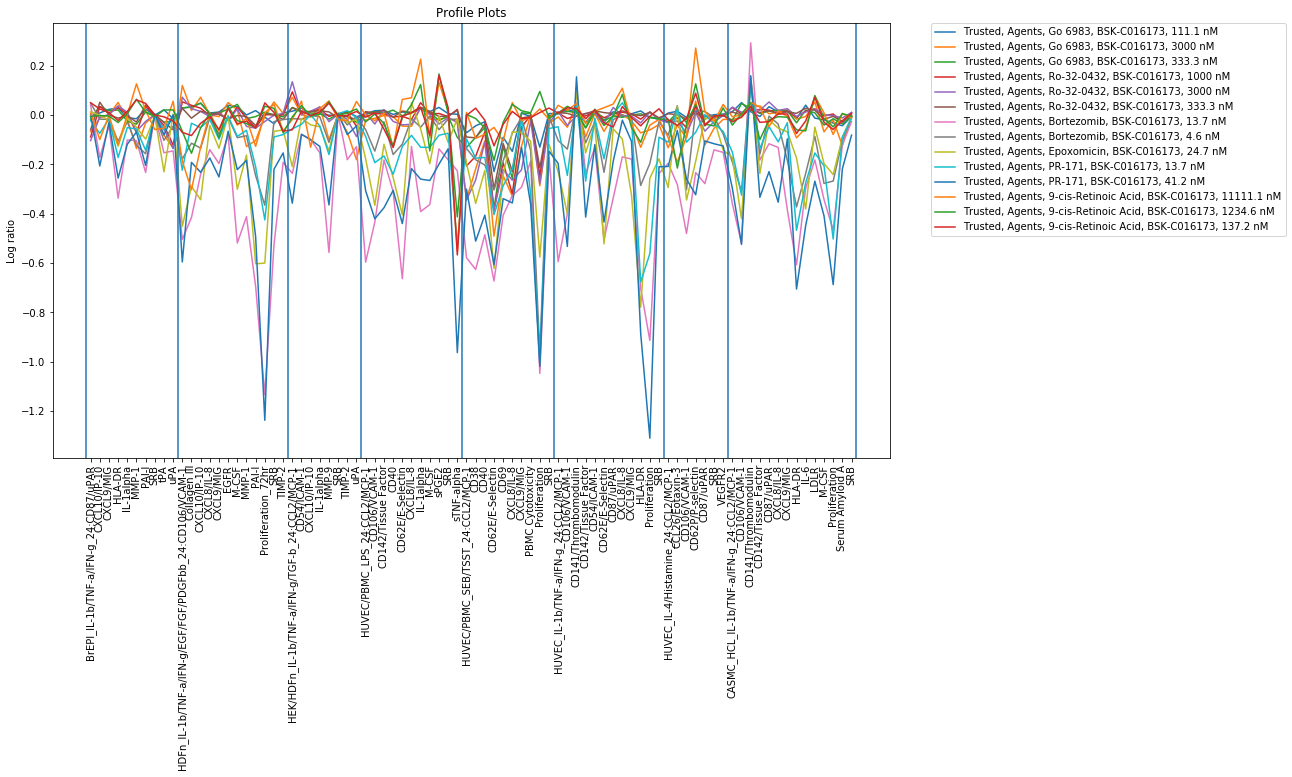

Predicted: PDE IV inhibitor


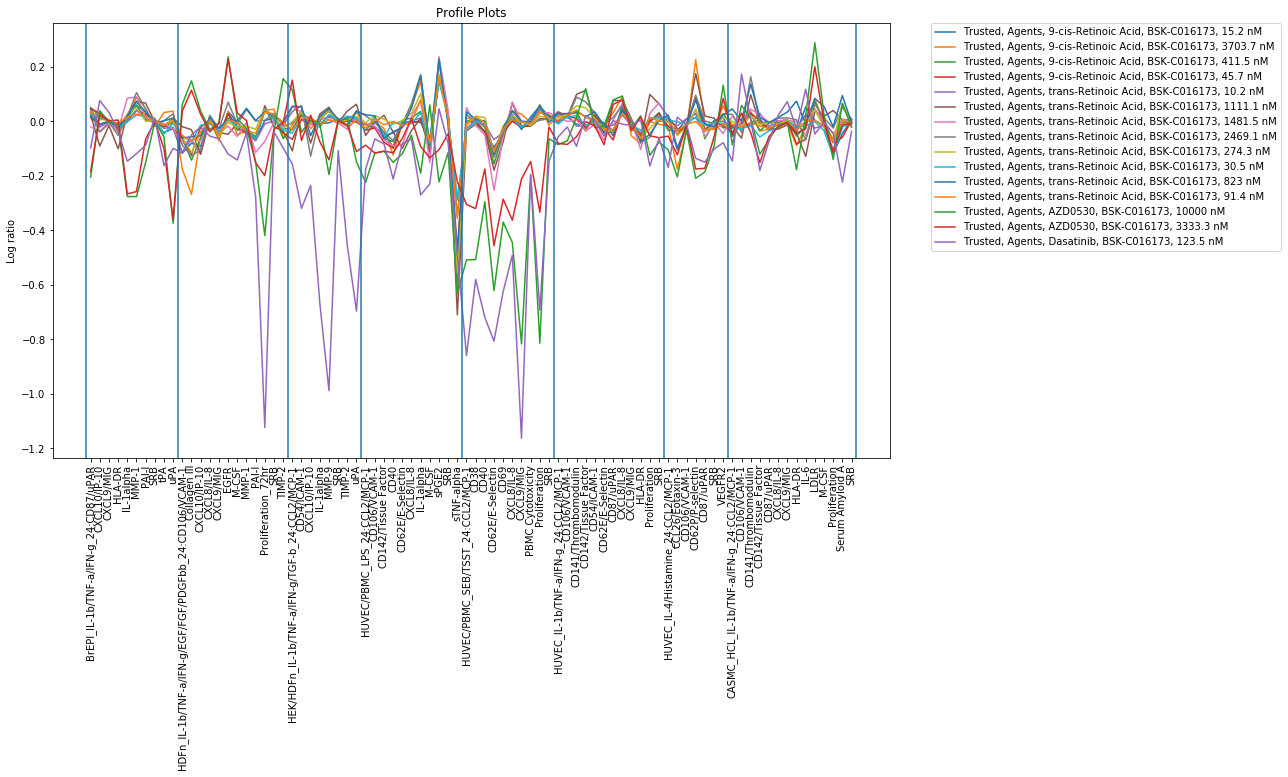

In [39]:
from scripts.profile_reader2 import ProfileReader
pr = ProfileReader(data_file='data/Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',
                           mechanism_file='data/Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
df = pr.get_profile(index=['mech', 'prof'])
df = pr.impute(df)


for mt in mism2['Mechanism_train'].unique():
    print("Traing:", mt)
    pr.plot(data=df.loc[mt])
    for mp in mism2[mism2['Mechanism_train'] == mt].Mechanism_pred.values:
        print("Predicted:", mp)
        pr.plot(data=df.loc[mp])        


In [ ]:
from scripts.profile_reader2 import ProfileReader
pr = ProfileReader(data_file='data/Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',
                           mechanism_file='data/Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
df = pr.get_profile(index=['mech', 'prof'])
df = pr.impute(df)

pr.plot(data=df.loc['TNF-α antagonist'])

### Conclusion
The classifier has a 84.1% accuracy compared to the traing data. By observationg the misclassified mechanisms one can easily conclude that the misclassified mechanisms are either too similar of too noisy. In the case of PDE IV inhibitor, p38 MAPK inhibitor, mTOR inhibitor, Vitamin D receptor agonist, TNF-α antagonist, PKC (c+n) inhibitor, EP agonist, very large negative response of sTNF-alpha can be observed. This may strongly bias the model to pick profiles incorrectly with similarly large signal. Another large signal is Proliferation, which may behave similarly. The model could be re-trained removing these very large signals to see if the performance increases.